Author: Ananthram
date: 29/06/19

In [2]:
%matplotlib inline
# from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from IPython.display import Image
from numpy.random import *
import getopt,sys
import time
from random import randint
from mpl_toolkits import mplot3d


In [4]:
energies = []
delta_e = []
probs = []
rs_flip = []
rs = []

In [5]:
N = 32

In [6]:
temp = 640

In [7]:
def init_lattice(N):
    global rs, rs_flip
    rs_flip=rs=2*np.random.randint(2, size=(N,N))-1
    return rs 

In [8]:
def show_lattice(rs):
    plt.imshow(rs, interpolation='nearest')
    plt.show()

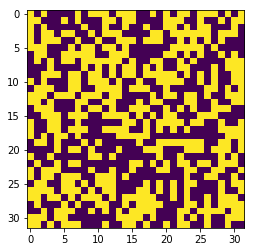

In [9]:
lattice=init_lattice(N)
show_lattice(rs)

In [10]:
def Energy(rs_flip):
    energy = 0
    for i in range(len(rs_flip)):
        for j in range(len(rs_flip)):
            S = rs[i,j]
            nb = rs[(i+1)%32, j] + rs[i,(j+1)%32] + rs[(i-1)%32, j] + rs[i,(j-1)%32]
            energy += -nb*S
    return energy

In [11]:
size=len(rs)
print("lattice size=", size)

lattice size= 32


In [12]:
def metropolis(nsteps, temp):
    global N, rs, rs_flip, energies, probs, delta_e
    for k in range(nsteps): # Monte-Carlo steps. 
        i = np.random.randint(0, N) # generate random number between 0 and < 16 assign that to i,j
        j = np.random.randint(0, N)
        e_o=Energy(rs) #calculate old energy

        rs_flip[i,j]=-rs[i,j] # flip the spin
        
        e=Energy(rs_flip) # calculate energy after the flip

        dE=e-e_o # difference in energy
        
        delta_e.append(dE)

        # save the flipping probability for later analysis
        if dE > 0:
            probs.append(np.exp(-dE/temp))
        # flip is energy is lower
        if dE<=0:            
            rs[i,j]=rs_flip[i,j]
            
            energies.append(e)

        # otherwise flip the spin if metropolis-hastings condition is true
        elif random(1)[0] < probs[-1]:
            rs[i,j]*=-1
            
            energies.append(e)
      
        # save energy for later analysis
#         energies.append(Energy(rs))

In [13]:
metropolis(1000,2)

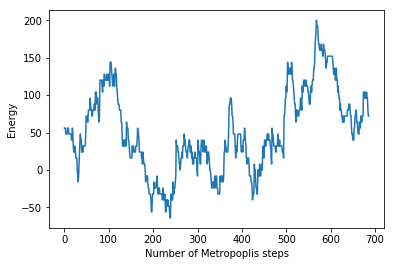

In [19]:
plt.xlabel("Number of Metropoplis steps")
plt.ylabel("Energy")
plt.plot(energies)

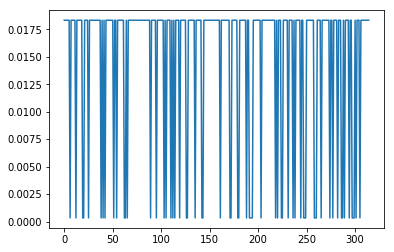

In [15]:
plt.plot(probs)

In [16]:
max(probs)

0.01831563888873418

In [17]:
min(energies)

-64

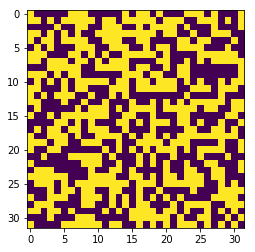

In [18]:
plt.imshow(rs, interpolation='nearest')
plt.show()

## References 
1. http://sadrnezhaad.ir/mahdi/index.php/physics/26-ising-model-and-simulation
2. Jason Brownlee, Machine learning mastery with python
3. The Ising model in the canonical ensemble: application of Metropolis Monte Carlo Method - Implementation in a code
